---
title: Motor Modeling Process
type: submodule
---

# Motor Modeling Process

In [1]:
from math import sin, cos, pi
import numpy
import matplotlib.pyplot as plt
%matplotlib inline  

## Part 0: Module Overview

The purpose of this writeup is to familiarize you with the level of engineering required for selecting a motor and geartrain for your project.  In this writup you will learn about the modeling, experimental, and design parameters you need in order to understand how to utilize a permanent-magnet DC motor in your project, how to pair it with a geartrain whose ratios you select, how to understand loss in your system, and how to select a battery

### Example problem description

Your team has decided to develop a self-balancing hoverboard for cats.  The system consists of two D.C. motors each attached to a belt drive which then attaches to two wheels.  Onboard is a motor controller, battery, housing, and bluetooth communication for throttle and brake.  The choice of motor, battery and belt drive are up to you, the designer.  

The company has created the following target performance specifications:  ***The system must propel the hoverboard up a 10$^{\circ}$ smooth concrete ramp while loaded with a 3 kg. rider at a speed of 3 m/sec for 1000 m.***

Engineers make analytical models to determine the components that go together to create the product, in this case you are the engineer and you must choose:

1.	the motor,
2.	the battery, and
3.	the belt drive pulley sizes.  

![hoverboard and kitty-rider](/figures/motor_modeling/h1-cat.png)

### List of Variables
These variables may be needed in your equations.  Please do not substitute the supplied values till the last step of your solution, to verify that your expression is correct.

|     Variable      | Description                          | Value  | Unit                 |
|:-----------------:|:-------------------------------------|:-------|:---------------------|
|        $r$        | radius of wheel                      | .04    | m                    |
|     $r_{pm}$      | radius of pulley at the motor        | select | m                    |
|     $r_{pw}$      | radius of pulley at the wheel        | select | m                    |
|        $m$        | mass of rider, board, and components | 3      | kg                   |
|        $g$        | gravity                              | 9.81   | m/s$^2$              |
| $\omega_{wheels}$ | angular velocity of wheel            | solve  | rad/sec              |
| $\omega_{motor}$  | angular velocity of motor            | select | rad/sec              |
|        $q$        | angle of hill                        | 10     | $^{\circ}$ (degrees) |
|  $\tau_{motor}$   | motor torque                         | select | N-m                  |
|  $\tau_{wheels}$  | wheel torque                         | solve  | N-m                  |
|        $v$        | velocity                             | 3      | m/s                  |
|        $d$        | distance                             | 1000   | m                    |

In [2]:
r = .04
mass = 3
gravity = 9.81
velocity = 3
distance = 1000
q = 10 * pi/180
time = distance/velocity

### Assumptions and Notes
* there are 180 degrees in each $\pi$ radians

## Part I: Free Body Diagrams, Forces, & Mechanical Power


### Problem Description

The purpose of this part's motor assignment is to understand the mechanical power required to propel your hoverboard and rider up a hill at constant velocity.


Remember that power is the scalar dot product of force and velocity or torque and angular velocity:
$$p=\vec{f}\cdot \vec{v} = \vec{\tau} \cdot \vec{\omega}$$
This gives you several ways to compute the mechanical power required.  If you know the torque at the wheels, then you will need to know how fast the wheels are spinning.  If you know the equivalent force at the wheel bearings, then you must find out the velocity of that point.  Either way you will need to find a force / torque term and the matching velocity / angular velocity term.

One way to find the forces involved in your system is with a *free body diagram*.


### Steps
1.  Create a 2D sketch of the longboard going up a hill. (See Figure 1)
1. Create a free body diagram for the wheel.  Draw and label all important variables and design parameters in your diagrams.  This includes things like dimensions, forces, velocities, angles, vectors.  Identify all forces acting upon each subsystem, including gravity, interaction forces between subsystems, and ground reaction forces.
1. Use static force / moment balance equations to solve for static equilibrium in each subsystem.  In planar systems,
$$\begin{aligned}
\sum F_x &= 0\\
\sum F_y &= 0\\
\sum M &= 0
\end{aligned}$$
Please expand these equations, using all forces and torques acting upon the wheel.
1. Using the above equations, solve for $f_T$, the force required to push the mass($m$) of board and rider up the hill.
1. Using the above equations, solve for the torque required at the wheels to achieve static equilibrium.
1. Given the velocity specification given in the assignment, how fast do the wheels spin?  Remember the releationship between linear and angular velocity, $\vec{v} = \vec{\omega} \times \vec{r}$, where $\vec{v}$ is linear velocity, $\vec{\omega}$ is angular velocity, and $\vec{r}$ is the vector to the point on the wheel's radius.
1. Given the equations for power mentioned above, please calculate how much power is required to maintain the board's velocity up the hill.

### Assumptions and Notes
* It may be beneficial to use the B frame rather than the A frame to sum forces and torques
* Assume a planar system, *ie* 2D.
* Assume the rider is stationary on the board, with the mass of the system centered about the  wheel.
* Keep all dimensions as variables throughout your work,  *ie*, if we say the velocity of the rider is 5 m/sec, use a variable like $v$ as you work through your equations.
* Important terms are terms that are used in equations.



### Numerical Solution
#### (1-2)
![Free Body Diagram](/figures/motor_modeling/fbd.png)

#### (3 - 4)
In front wheel, using the B frame, since it is free spinning, the ground can only supply a reaction force normal to the wheels, and no moments can be transmitted.

$$\begin{aligned}
\sum F_x &= 0\\
\sum F_y &= 0\\
\sum M &= 0
\end{aligned}$$

if I first define $\vec{f_R}$ as:
$$\vec{f}_R = f_{T}\hat{b}_x + f_{N}\hat{b}_y$$

##### Rotation Matrix for Frames A and B
$$
\begin{array}{c|c c c}
  ^AR^B & \hat{b}_x &\hat{b}_y & \hat{b}_z\\
  \hline
  \hat{a}_x &\cos q&-\sin q &0 \\
  \hat{a}_y &\sin q& \cos q &0 \\
  \hat{a}_z &0&0&1
 \end{array}
$$

Summing forces along $b_x$:
$$\begin{aligned}
0&=\sum F_x\\
0 &= f_{T}\hat{b}_x - mg \sin(q)\hat{b}_x\\
0 &= f_{T} - mg \sin(q)\\
f_{T} &= mg \sin(q)\\
\end{aligned}$$


In [3]:
ft = mass*gravity*sin(q)
ft

5.1104658687377595

summing forces along $b_y$:
$$\begin{aligned}
0&=\sum F_y\\
0 &= \vec{f}_{N}\hat{b}_y - mg \cos(q)\hat{b}_y\\
0 &= \vec{f}_{N} -\frac{ mg \cos(q)}{2} \\
f_{N} &= mg \cos(q)\\
\end{aligned}$$

In [4]:
fn = mass*gravity*cos(q)
fn

28.98289217114928

#### (5)
Sum moments to find motor torque:
$$\begin{aligned}
0&=\sum M \\
0&= -\tau_{wheels} \hat{b}_z + -r \hat{b}_y \times \vec{f}_R\\
0&= -\tau_{wheels} \hat{b}_z + -r \hat{b}_y \times \left(f_t\hat{b}_x + f_n \hat{b}_y\right)\\
0&= -\tau_{wheels} \hat{b}_z + \left(-r \hat{b}_y \times f_t\hat{b}_x \right)+\left(-r \hat{b}_y \times f_n \hat{b}_y\right)\\
0&= -\tau_{wheels} \hat{b}_z + rf_T \hat{b}_z\\
0&= -\tau_{wheels}  + rf_T\\
\tau_{wheels}&= rf_T\\
\end{aligned}$$

In [5]:
t_wheels = r*ft
t_wheels

0.2044186347495104

#### (6)
$$ v=\omega_{wheels}r $$
$$ \omega_{wheels}r =v$$
$$ \omega_{wheels}=\frac{v}{r} $$

In [6]:
w_wheels = velocity/r
w_wheels

75.0

#### (7)

you can do this several ways.  First, use the force-velocity formulation for power:
$$P = f_T* v = (mg \sin(q)) * (v)$$

Alternatively, use the torque - angular velocity version:
$$P = t* \omega = (rmg \sin(q)) * (\frac{v}{r})$$

You can also do it a different way.  First calculate the total height change of the mass
$$ h = d*sin(q)$$
find the time it takes to get there:
$$ t = d/v$$
find the energy it takes to lift mg:
$$PE = mgh $$
and then find the average power as a function of energy and time:
$$\begin{aligned}
P &= \frac{PE}{t}\\
P &= \frac{mgh}{d/v}\\
P &= \frac{mgdsin(q)v}{d}\\
P &= mgsin(q)v
\end{aligned}$$

In [7]:
power_mechanical = ft*velocity
power_mechanical

15.33139760621328

## Part II: Friction & Loss

You need to estimate the effects of mechanical loss on your physical system.  This is difficult because you don't have your system.  Nevertheless, it is your job to estimate how this loss will affect your energy requirements.

### Coulomb Friction
A discussion of friction usually begins and ends with the discussion of Coulomb Friction.  A coulomb friction model usually depends on  two materials sliding against each other, as well as a normal force($f_{normal}$) pushing those two surfaces together.  The two materials interact at a variety of size scales, from atomic scales up to visible scales; the relationship between the two materials is characterized by a parameter $\mu$.  The relationship between the scalar magnitudes of these forces is characterized by this well known equation:
$$f_{friction} \leq \mu f_{normal}$$
while the direction of the friction force is always against the direction of travel.

### Damping
Damping is a lossy force which is applied against the direction of travel.  Bodies moving through a fluid often experience the effects of damping. There are many models for damping, but linear damping models are characterized by the equation
$$f_{damping} = b ||\vec{v}||$$


### Interfaces

Mechanical loss occurs when moving bodies interact with each other in non-ideal ways.  This can be forces generated during sliding, rolling, pushing fluids out of the way while moving, etc.

### Steps

1. Find an appropriate stand-in device for the proposed system.  Discuss why this device is appropriate for estimating the mechanical loss in your system.
1. Determine a method for measuring the loss.  The method you use may have an impact on the types of models.  You should consider what you are measuring and which models can be used with that measurement.  Some may be more appropriate than others, and it is up to you to make a detailed justification why your selection is appropriate for the task.
1. Write up your method, justifying your while you go
1. Using your model, now extrapolate to the proposed system, using the given design parameters and performance specifications.  Use your model to  compute two things. the additional power required from the motor, and the torque required at the wheel to overcome it.  


## Part III: Motor Modeling
The purpose of this assignment is to select an operating speed which can achieve your power  requirements in delivering torque at the right velocity to your wheels.  While you already calculated $w_{wheels}$ and $\tau_{wheels}$, you have not yet selected a geartrain, permitting you to identify the best speed for delivering mechanical power to your system.  Your system has one motor mounted at each of the two wheels, permitting you to halve the amount of power required for each motor(but not the total power required for the system)

### Motor Model
![typical linear speed-torque curve](/figures/motor_modeling/motor_model.png)

Typically, motors are tested at a specified voltage under various loads.  The resulting current, torque, and angular velocity are then experimentally found and recorded.  From these values, a wealth of information can be gleaned about the motor.  Typical permanent-magnet DC motors exhibit a torque-speed relationship that can be modeled as linear, as seen above.


### Motor Modeling Equations

The voltage constant for motors is often given by a KV rating, usually in units of RPM/V. find the SI version.

The torque constant relates the current to torque generated by the motor.  one way to determine this is to find the stall current and the free running current and to find the slope between them.

$$k_v = (KV)2\pi/60$$
This permits one to determine the motor's free-running speed at any voltage using the equation
$$\omega_{free\ running} = k_v V$$

We will use the following equations to compute $k_t$:
$$k_t = \frac{\tau_{stall}-\tau_{free\ running}}{I_{stall} - I_{free\ running}}$$

With $k_t$ determined you can then calculate the torque at any current and constant voltage using the function
$$\tau(I) = k_t(I-I_{free\ running})$$

Using the assumption of a linear motor model(valid for fixed permanent magnet DC motors), we can find the torque at any speed from $0$ to $\omega_{free\ running}$ using the equation
$$\tau(\omega)=\tau_{stall}(k_v V - \omega)$$

The following equations can be used to compute mechanical and electrical power:
$$P_{mechanical}=\tau*\omega$$
$$P_{electrical}=IV$$

The efficiency of your system can be calulated as a function of power out(mechanical) over power in(electrical).  
$$eff = \frac{P_{mechanical}}{P_{electrical}}$$


### Updated Variables
In addition to the variables supplied in the overview, there are some new variables and updated values which you can use in this assignment.

|      Variable       | Description                                  | Value  | Unit      |
|:-------------------:|:---------------------------------------------|:-------|:----------|
|  $P_{mechanical}$   | Required mechanical power per motor          | 8      | W         |
|      $w_{max}$      | Maximum (no-load) speed                      | obtain | rad/sec   |
|         $V$         | Nominal Voltage                              | obtain | V         |
|   $\tau_{stall}$    | Stall Torque                                 | obtain | N-m       |
|     $I_{stall}$     | Stall Current                                | obtain | Amp       |
| $I_{free\ running}$ | free running current                         | obtain | Amp       |
|        $k_v$        | selected motor's speed/voltage relationship  | obtain | rad/V-sec |
|        $k_t$        | selected motor's current/torque relationship | obtain | N-m/Amp   |

### Steps
1. Go to <https://www.pololu.com/product/2269> and find the following specs: Maximum(no load) RPM, stall torque, stall current, free running current, and voltage the motor was tested at to obtain those numbers.
1. compute torque and speed constants using the equations above.  
1. Write the equation you need to compute mechanical power
1. Write the equation you need to compute electrical power
1. Using $k_v$ & $V$, plot the *linear* speed-torque curve as a function of $w_{motor}$ (put $w_{motor}$ along the x-axis).
1. Using the expression for $P_{mechanical}$ plot the mechanical power curve as a function of $w_{motor}$ (put $w_{motor}$ along the x-axis). Identify the motor operating point(speed) which produces the most power.
1. Using $\tau(I)$, solve for $I$ and use to compute the electrical power as a function of $w_{motor}$.
1. Using the expression for $eff$, plot the motor efficiency as a function of $w_{motor}$ (put $w_{motor}$ along the x-axis). Identify the motor operating point(speed) which is the most efficient.
1. Using the motor requirements derived in part 1, and the loss you determined in part 2, select an operating speed which balances power, efficiency, and specifications.  Discuss why other operating points do not balance those considerations as effectively.  Consider total power usage, current limitations, efficiency, size, weight, etc in your answer.

### Assumptions and Notes
* use Matlab, excel, python, etc for creating plots.  Do not hand-draw.
* the x axis for your plots should go from 0 to $w_{max}$
* Remember there are two motors, one at each wheel.  So the power requirements for each are half of your total requirements.
* label your axes and title your figures
* Convert all units to SI before computing your answer.  Answers/expressions in non-SI units will not be considered.  Supply the conversion factor you used.
### Numerical Solution
#### (1)

Using motor constants from [this](https://www.pololu.com/product/2269) Pololu motor:

In [8]:
w_max_rpm  = 10000
#Convert to rad/sec
w_max = w_max_rpm  * 2*pi/60

torque_stall_ozin= 5
#convert to N-m
torque_stall = torque_stall_ozin * 0.0070615518333333

current_stall = 6.5
current_free_running  = .275

voltage_run = 6
voltage_free_stall = 0

Find the range of the current from stall to free-running

In [9]:
i_range = current_stall-current_free_running

#### (2)
Find $k_t$ and $k_v$ , the torque and voltage constants

In [10]:
kt = torque_stall/i_range

In [11]:
voltage_range = voltage_run - voltage_free_stall
kv = w_max/voltage_range

In [12]:
voltage_run = 6
ii = numpy.r_[0:1:21j]
w = ii * w_max

#### (3-4)

In [13]:
def calc_motor(kt,torque_stall,w_max,current_free_running,voltage_run,w_motor):
    torque = (1-(w_motor/w_max))*torque_stall
    current = torque/kt+current_free_running
    motor_power_mechanical= w_motor*torque
    motor_power_electrical = current*voltage_run
    motor_efficiency = motor_power_mechanical/motor_power_electrical
    return torque,motor_power_mechanical, motor_power_electrical, motor_efficiency

In [14]:
torque,motor_power_mechanical_t, motor_power_electrical_t, motor_efficiency = calc_motor(kt,torque_stall,w_max,current_free_running,voltage_run,w)

#### (5)

Text(0, 0.5, '$\\tau$ (Nm)')

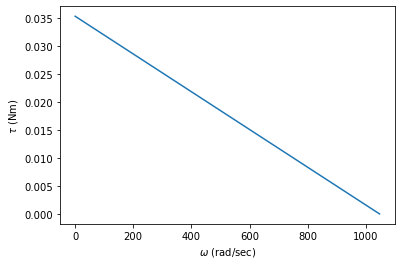

In [15]:
plt.figure()
plt.plot(w,torque)
plt.xlabel('$\omega$ (rad/sec)')
plt.ylabel('$\\tau$ (Nm)')

#### (6)

Text(0, 0.5, '$Power$ (W)')

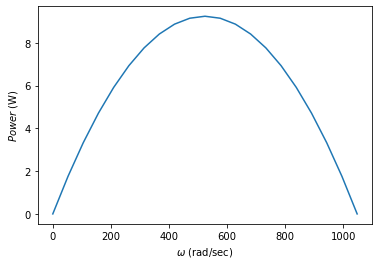

In [16]:
plt.figure()
plt.plot(w,motor_power_mechanical_t)
plt.xlabel('$\omega$ (rad/sec)')
plt.ylabel('$Power$ (W)')

As you can see, the maximum power occurs at w_max/2
#### (7-9)

Text(0, 0.5, '$Eff$ (%)')

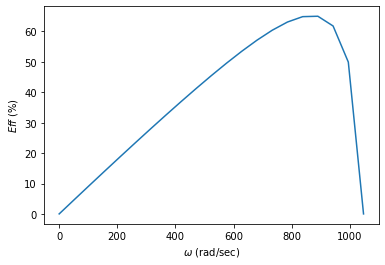

In [17]:
plt.figure()
plt.plot(w,motor_efficiency*100)
plt.xlabel('$\omega$ (rad/sec)')
plt.ylabel('$Eff$ (%)')

I have selected 710 rad/sec as my operating point.  Now I need to compute the mechancial power, electrical power, and effeciency once again

In [18]:
w_motor = 710

In [19]:
torque1,motor_power_mechanical1, motor_power_electrical1, motor_efficiency1 = calc_motor(kt,torque_stall,w_max,current_free_running,voltage_run,w_motor)
print('torque = ', torque1)
print('motor_power_mechanical = ', motor_power_mechanical1)
print('motor_power_electrical = ', motor_power_electrical1)
print('motor_efficiency = ', motor_efficiency1)


torque =  0.011369096418946867
motor_power_mechanical =  8.072058457452275
motor_power_electrical =  13.676697849705437
motor_efficiency =  0.5902052195754348


The full model in one plot, with the design point selected:

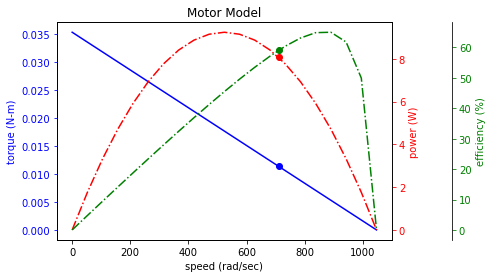

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

p1 = ax1.plot(w,torque, 'b-')
p11 = ax1.plot(w_motor,torque1,'bo')
ax1.set_xlabel('speed (rad/sec)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('torque (N-m)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
p2 = ax2.plot(w, motor_power_mechanical_t, 'r-.')
p22 = ax2.plot(w_motor, motor_power_mechanical1, 'ro')
ax2.set_ylabel('power (W)', color='r')
ax2.tick_params('y', colors='r')

ax3 = ax1.twinx()
p3 = ax3.plot(w, motor_efficiency*100, 'g-.')
p3 = ax3.plot(w_motor, motor_efficiency1*100, 'go')
ax3.set_ylabel('efficiency (%)', color='g')
ax3.tick_params('y', colors='g')

#lns = [p1, p2, p3]
#ax1.legend(handles=lns, loc='bevst')

# right, left, top, bottom
ax3.spines['right'].set_position(('outward', 60))  

ax1.set_title('Motor Model')
plt.show()


## Part IV: Geartrain Selection
### Overview

The goal of this part is to determine the relationship between torque and angular velocity within your transmission (belt-drive system).  The key is to remember the power equation.  Assuming that the power into an ideal transmission is equal to the power out, you can solve for the change in velocity and force (or angular velocity and torque) between the input and output.

Power on both sides of the transmission is defined by the torque and angular velocity delivered through it.
$$P = t\omega$$
additionally, for the purposes of this exercise you can assume the transmission is ideal, or
$$P_{in} = P_{out}$$
Assume a motor is connected to the wheel via belt and a set of pulleys with radius $r_{pm}$ over the motor and $r_{pw}$ over the wheel.

### Updated Variables
In addition to the variables supplied in the overview, there are some updates.

|     Variable      | Description               | Value                 | Unit    |
|:-----------------:|:--------------------------|:----------------------|:--------|
| $\omega_{wheels}$ | angular velocity of wheel | 75 (solved in Part I)    | rad/sec |
|  $\tau_{wheels}$  | torque at wheels          | .2 (solved in Part I)    | N-m     |
| $\omega_{motor}$  | angular velocity of motor | 710 (solved Part III)   | rad/sec |
|  $\tau_{motor}$   | motor torque              | .0114 (solved Part III) | N-m     |

### Steps
1. Before doing anything else, draw a labeled sketch of the system to get an idea of the layout and how the components are connected.  Use a straightedge for straight lines.  label dimensions of your components.  Include wheel radius and pulley radii.
1.  Assume a motor is connected to the wheel via belt and pulleys with radius $r_{pm}$ and $r_{pw}$. find an expression which relates the angular velocity of the wheel to the angular velocity of the motor using those two variables.
1. Using the previous solution for $\tau_{wheels}$, the wheel torque required to maintain static equilibrium, find an expression for the torque required at the motors to establish static equilibrium.  Do not use numerical answers, use variables.
1.  Go online and find a set of toothed belt pulleys.  Use a gear ratio which makes sense for your design, and find the best approximate pair for your project.  Make sure they are a matching pair, for the same belt.  Report the links and discuss whether this selection is appropriate.
1. Go back to the pololu site and compare with existing gearheads for the motor (<https://www.pololu.com/search/compare/183>).  would any of those make more sense to use?  Explain the benefits and tradeoffs.  re-run your previous models if necessary.

### Assumptions and Notes
* There is one motor connected to each wheel.  This means your wheel torque(.2Nm) and power(16W) requirements for each motor will be half (.1Nm, 8W, respectively)
* To find the speed in / out relationship, use the assumption that the speed of the belt is the same at all points, along with the linear to angular velocity relationship discovered previously.
* you can assume a frictionless geartrain and use the fact that the power in is equivalent to the power out, or solve  the torque balance.
* Try <https://shop.sdp-si.com/>.


## Part IV Walkthrough

1. 
should include motor, battery, pulleys, board, rider, wheel.   each should be labeled.  
should be labels for pulley radii, wheel radii
2. 
If the input power is defined by the torque and angular velocity into the transmission
$$P = t\omega$$
$$P_{motor} = t_{motor} \omega_{motor}$$
then the output power is defined by
$$P_{wheel} = t_{wheel} \omega_{wheel}$$
given the speed relationship that the belt is moving at the same speed everywhere,
$$v_{belt} = r_{pm} \omega_{motor} = r_{pw} \omega_{wheel}$$
you can solve for the motor speed
$$\omega_{motor} =\frac{ r_{pw}}{r_{pm}} \omega_{wheel}$$
3. 
Assuming that power in is equal to power out, you can then  solve for the motor torque
$$\begin{aligned}
P_{motor} &= P_{wheel}\\
t_{motor} \omega_{motor}&= t_{wheel} \omega_{wheel}\\
t_{motor}&= \frac{t_{wheel} \omega_{wheel}}{ \omega_{motor} }\\
t_{motor}&= \frac{t_{wheel} \omega_{wheel}}{ \frac{ r_{pw}}{r_{pm}} \omega_{wheel} }\\
t_{motor}&= \frac{r_{pm}}{ r_{pw}}t_{wheel}\\
\end{aligned}$$
4. 
There are several things to check.  First, the wheel pulley should not be larger than the wheel, otherwise it will hit the ground.  Second, the belts should


Compute the gear ratio required between motor and wheel

In [21]:
G = w_wheels/w_motor
G

0.1056338028169014

Selecting a pulley radius of .01m allows me to calculate the wheel pulley radius

In [22]:
rpm = .01
rpw = rpm/G
print('radius motor pulley = {:.4f}'.format(rpm))
print('radius wheel pulley = {:.4f}'.format(rpw))


radius motor pulley = 0.0100
radius wheel pulley = 0.0947


using the supplied equations I can calulate the wheel torque

In [23]:
#w_motor = rpw/rpm * w_wheels
t_wheel = t_wheels/2
t_motor = rpm/rpw * t_wheel
print('t_motor= {:.2f}'.format(t_motor))

t_motor= 0.01


Using the power required vs the power supplied allows me to calculate the extra power available to overcome loss forces:

In [24]:
friction_force = (motor_power_mechanical1*2 - power_mechanical)/velocity
friction_force

0.2709064362304237


## Part V: Battery Selection

The goal of this part is to understand the interplay between key parameters involved in battery selection

## Procedure

1. Using the motor speed you selected in Part III and the resulting motor efficiency at that point, calculate the electrical power required to run your system.  
1. Using the distance and velocity specifications from Part I, calculate the amount of time your system must run
1. Integrate your electrical power requirement to determine electrical energy required.
1. Find a battery online with both the power delivery capability and energy capacity to achieve the answers to 1 and 3.  Compute and/or report the maximum discharge rate for the selected battery, along with the maximum capacity.
1. Find the mass of the battery.  Recompute the mechanical power requirements from Part I.  
1.  Look at the motor curves from Part III.  Will the battery's mass added to the system force you to select a new motor or gear train?  All of the above?  Will you then need an even bigger battery?  Discuss whether/where your design breaks down and how you need to fix it.

## Suggestions
* Different battery chemistries vary widely in their specifications.  Make sure you are aware of the differences.  Lithium-Ion and Lithium-Polymer batteries are suggested, as their power/mass density is quite high.
* Look online to find out some of the characteristics of LiPo batteries; make sure you understand what the "C" rating means when computing discharge current.  Try <https://rogershobbycenter.com/lipoguide/>


## Battery Selection

Lithium Polymer cells are typically 3.7V

In [25]:
voltage_battery = 3.7

The total electrical power from both motors is twice each one:

In [26]:
total_electrical_power = motor_power_electrical1*2
total_electrical_power

27.353395699410875

the total energy $E$ related to power$P$ and time $t$ is equal $E=\int P\partial t$.  When P is constant, this simplifies to $E=Pt$ 

In [27]:
total_electrical_energy = total_electrical_power*time
total_electrical_energy

9117.798566470292

The battery current required use the electrical power equation $P=IV$ where $P$ is power, $I$ is current, and $V$ is voltage.  Using the battery voltage established earlier:

In [28]:
battery_current = total_electrical_power/voltage_battery 
battery_current

7.3928096484894255

Batteries are often rated in mAh, or milli-Amp-hours, which is a measure of total charge. This can be obtained by dividing by battery voltage and changing the units from coulombs to A-h

In [29]:
battery_rating_mAh = total_electrical_energy/voltage_battery /60/60*1000
battery_rating_mAh

684.519411897169

## Part VI: Testing

### Overview

This part is meant to confirm some of the values you retrieved from the pololu site.  You will be testing a Pololu motor

### Steps
1.  Convert your previous system diagram from motor modeling assignment 4 to a vector drawing in illustrator, powerpoint, inkscape, etc.
1. Go to the lab and extract the motor parameters for a selected motor.  get $k_v$, $k_t$ and the torque-speed curve for a given voltage (6V max).
1. plot the speed torque curve given your motor parameters
1. Using
    $$\tau = k_i i$$
    $$V = iR + \omega/k_v$$
    Find an expression for torque($\tau$) as a function of speed ($\omega$)
1. Using $P=\tau*\omega$, find an expression for the Power as a function of speed
1. overplot this on your speed torque curve.
1. Take the derivative of this expression as a function of speed, and find the speed which achieves  maximum power.  (Evaluate to ensure it's a maximum not a minimum)  Solve for $P$ at that point.
1. Using the results from this expression and the angular velocity of the wheel, determine the optimal gear ratio.
1. Using obtained motor parameters and the expression for electrical power($P=iV$) and mechanical power($P=\tau \omega$), calculate motor efficiency at this operating point.
1.  **Optional:** Change your expression to maximize motor efficiency.  Update the answer for optimal gear ratio.
1. Identify the total electrical energy required to meet product specifications, factoring in motor efficiency.
1. Select a battery which meets both power and energy requirements.

### Numerical Solution

In [30]:
%matplotlib inline
import numpy 
import matplotlib.pyplot as plt

From the data, we can correlate the max speed and voltage together.  From steady state at max speed, 

#### (1)

![System Overview](/figures/motor_modeling/system.png)

#### (2-3)
Data plotted in excel to obtain linear fitted models during acceleration

![Torque vs Current](/figures/motor_modeling/torque-vs-current.png)

![Speed vs Voltage](/figures/motor_modeling/speed-vs-voltage.png)

![Torque & Efficiency vs Speed](/figures/motor_modeling/torque_efficiency_speed.png)

In [31]:
#w_max_rpm = 10000
#w_max = w_max_rpm*2*pi/60
w_max = 212.6146

%matplotlib inline
import numpy 
import matplotlib.pyplot as plt

From the data, we can correlate the max speed and voltage together.  From steady state at max speed, 

In [32]:
V_nominal = 6.15
w_max = 211
k_v = w_max/V_nominal
k_v

34.30894308943089

Or you can use the fitted model above

In [33]:
k_v = 34.658

The Resistance was obtained by holding the motor fixed at a nonzero voltage and recording the current.

Ohm's Law: 
$$V=IR$$

From measurements:

$$V = 2.62$$
$$I = 2.48$$
$$R=V/I$$

In [34]:
R = 2.62/2.48
R

i_stall = V_nominal / R
i_stall

5.8213740458015275

Free running current was obtained from the data

In [35]:
i_free_running = .07

kt = .021
t_stall = kt*i_stall

#### (4)

Given $V = iR+\frac{\omega}{k_v}$, we can solve for $i$
$$i = \frac{V-\frac{\omega}{k_v} }{R}$$
Then, given $\tau = k_i i$, we can insert that previous answer to find $\tau$ 
$$\tau =\frac{ k_i}{R}\left(V- \frac{\omega}{k_v}\right)$$


#### (5)

Given the previous answer and $P=\tau\omega$, 

$$P=\frac{ k_i}{R}\left( V\omega - \frac{\omega^2}{k_v} \right)$$

#### (6)
See data collected from above with efficiency plotted over speed/torque, and the resulting model-based plots, with efficiency plotted over modeled speed/torque.

#### (7)
$$\frac{dP}{d\omega} = \frac{k_i}{R}\left(V-\frac{2\omega}{k_v}\right)$$

Solving for $\omega_{Pmax}$ when $\frac{dP}{d\omega} =0$, 
$$0=\left(V-\frac{2\omega_{Pmax}}{k_v}\right)$$
$$\frac{2\omega_{Pmax}}{k_v}=V$$
$$\omega_{Pmax} = \frac{k_v V}{2}$$

using the relation that $k_v V = \omega_{unloaded}$, the unloaded motor speed, 
$$\omega_{Pmax} = \frac{\omega_{unloaded}}{2}$$

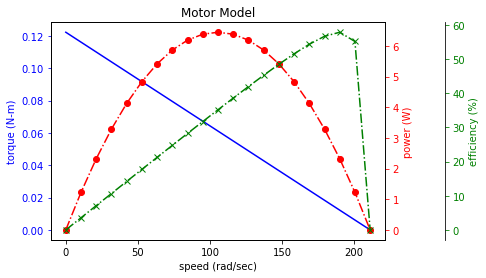

In [36]:
ii = numpy.r_[0:1:21j]
w=ii*w_max
w

t = (1-ii)*t_stall
t

t2 = (w_max-w)/w_max * t_stall
t2

i = 1/kt*t+i_free_running

p_mech = t* w
p_mech

p_elec = i* V_nominal
p_elec

eff = p_mech/p_elec * 100
eff

G=1

t_output = G*t
w_output = 1/G*w

fig = plt.figure()
ax1 = fig.add_subplot(111)

p1 = ax1.plot(w_output,t_output, 'b-')
ax1.set_xlabel('speed (rad/sec)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('torque (N-m)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
p2 = ax2.plot(w_output, p_mech, 'ro-.')
ax2.set_ylabel('power (W)', color='r')
ax2.tick_params('y', colors='r')

ax3 = ax1.twinx()
p3 = ax3.plot(w_output, eff, 'gx-.')
ax3.set_ylabel('efficiency (%)', color='g')
ax3.tick_params('y', colors='g')

#lns = [p1, p2, p3]
#ax1.legend(handles=lns, loc='bevst')

# right, left, top, bottom
ax3.spines['right'].set_position(('outward', 60))  

ax1.set_title('Motor Model')
plt.show()

#### (8)
From the model above, the maximum power can be achieved at 105 rad/sec.  The angular velocity of the wheel, previously calculated, was 75 rad/sec.  Therefore:

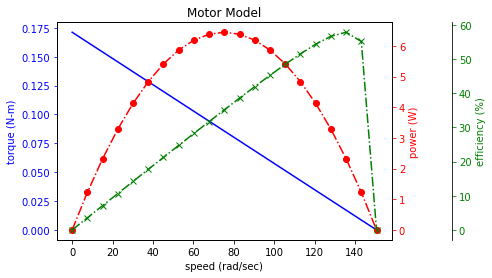

In [37]:
G=105/75

t_output = G*t
w_output = 1/G*w

fig = plt.figure()
ax1 = fig.add_subplot(111)

p1 = ax1.plot(w_output,t_output, 'b-')
ax1.set_xlabel('speed (rad/sec)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('torque (N-m)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
p2 = ax2.plot(w_output, p_mech, 'ro-.')
ax2.set_ylabel('power (W)', color='r')
ax2.tick_params('y', colors='r')

ax3 = ax1.twinx()
p3 = ax3.plot(w_output, eff, 'gx-.')
ax3.set_ylabel('efficiency (%)', color='g')
ax3.tick_params('y', colors='g')

#lns = [p1, p2, p3]
#ax1.legend(handles=lns, loc='bevst')

# right, left, top, bottom
ax3.spines['right'].set_position(('outward', 60))  

ax1.set_title('Motor Model')
plt.show()

#### (9)
As you can see from the adjusted plot, the efficiency at the optimal speed is 35%

#### (11-12)
covered in previous assignments.